# Regulome Explorer Notebook 

This notebook computes association scores between numerical features (Gene expression and Somatic copy number) of a list of genes and other features available in TCGA BigQuery tables. The specific statistical tests used between the features are described in the following link: https://github.com/isb-cgc/Community-Notebooks/tree/master/RegulomeExplorer 

The output of the notebook is a table sorted by association scores, so that strongest associations between Gene expression and the user specified molecular feature is  displayed at the top of the resulting table.

This notebook also performs a more detailed analysis from a user specified pair of features names (genes, mutation, clinical annotations, etc.). The analysis includes the computation of p-values, additional statistics, and figures in a similar style than Regulome explorer.

Check out more notebooks at ['Community Notebooks Repository'](https://github.com/isb-cgc/Community-Notebooks/)!


### Authentication
The first step is to authorize access to BigQuery and the Google Cloud. For more information see ['Quick Start Guide to ISB-CGC'](https://isb-cancer-genomics-cloud.readthedocs.io/en/latest/sections/HowToGetStartedonISB-CGC.html) and alternative authentication methods can be found [here](https://googleapis.github.io/google-cloud-python/latest/core/auth.html).

### Import Python libraries

In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
from google.cloud import bigquery
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import ipywidgets as widgets
import re_module.bq_functions as regulome

### Specify Parameters
The parameters for this experiment are the cancer type (study), a list of genes, a molecular feature that will be compared with gene expression, and the minimum number of samples required for the statistical analysis. 

In [2]:
[study, feature1_name, feature2_name, gene_names, size] = regulome.makeWidgets()

### Build the query
The Bigquery to compute associations between feature 1 and 2 is composed of four tables. The first table contains data of feature 1 of the user defined list of names, The second contains data of feature 2, the third table is a combination of tables 1 and 2, ad the final table contains final statistics. The tables are created using functions in the 'regulome' module. Please refer to our github repository to access the notebooks with description of the methods used for each possible combination of features available in TCGA: https://github.com/isb-cgc/Community-Notebooks/tree/master/RegulomeExplorer 
 

In [3]:
query_table1 = regulome.get_feature1_table( study.value, feature1_name.value )
query_table2 = regulome.get_feature2_table( study.value, feature2_name.value )
str_summarized = regulome.get_summarized_table( feature1_name.value ,feature2_name.value  )
str_stats = regulome.get_stat_table( feature2_name.value, size.value )

sql = ( 'WITH' + query_table1 + ',' + query_table2 + ',' + str_summarized + str_stats)
#print(sql)

### Run the Bigquery

In [4]:
bqclient = bigquery.Client()
gene_list = [ x.strip() for x in gene_names.value.split(',') ]
df_results = regulome.runQuery ( bqclient, sql, gene_list , dryRun=False )
df_results[0:10]


 in runQuery ... 
    this query processed 7757877633 bytes 
    Approx. elpased time : 12001 miliseconds 


,symbol1,symbol2,n,correlation
0,ADAM6,LOC96610,540,0.954897
1,ADAM6,IGJ,540,0.918271
2,ADAM6,MGC29506,540,0.910795
3,ADAM6,FCRL5,540,0.893261
4,ADAM6,TNFRSF17,540,0.874617
5,ADAM6,CD79A,540,0.871937
6,ADAM6,POU2AF1,540,0.856714
7,ADAM6,IRF4,540,0.799697
8,ADAM6,SLAMF7,540,0.786947
9,ADAM6,CD27,540,0.784658


## Analyze a pair labels
From the table above please select a pair of features names to perform a statistical analysis and display the data. You can print the variable 'pair_query' to obtain the query used to retrieve the data. 
**pair_query** is the query used to retreive the necessary data for the statistical test. 

In [5]:
[name1 , name2 ] = regulome.makeWidgetsPair()


 in runQuery ... 
    this query processed 7757877633 bytes 
    Approx. elpased time : 3378 miliseconds 
SpearmanrResult(correlation=0.91827140086976378, pvalue=1.2724813661443188e-218)


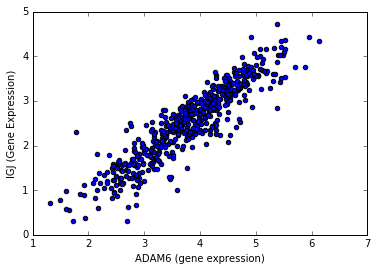

In [6]:
pair_query = regulome.get_query_pair(name1.value,name2.value,study.value,feature1_name.value,feature2_name.value)
#print(pair_query)
df_pair = regulome.runQuery( bqclient, pair_query, [] , dryRun=False )
regulome.plot_statistics_pair ( df_pair, feature2_name.value, name1.value, name2.value, size.value )  

In [ ]:
df_pair